In [1]:
import pandas as pd

In [5]:
jp10 = pd.read_csv('/Users/gracuamole/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/Research/jp10.csv')
us10 = pd.read_csv('/Users/gracuamole/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/Research/us10.csv')

In [31]:
jp10df = jp10[['TIME_PERIOD','OBS_VALUE']]
jp10df.TIME_PERIOD = pd.to_datetime(jp10df.TIME_PERIOD)
jp10df.dtypes
jp10df = jp10df.rename(columns={"OBS_VALUE":"jp10_yields"})
display(jp10df)

/var/folders/0s/_z7d7r1s13n_5dsp2jhd1yg40000gn/T/ipykernel_16492/2167218423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jp10df.TIME_PERIOD = pd.to_datetime(jp10df.TIME_PERIOD)


,TIME_PERIOD,jp10_yields
0,1980-01-01,1.999848
1,1980-02-01,1.572240
2,1980-03-01,2.593482
3,1980-04-01,1.903286
4,1980-05-01,0.435398
...,...,...
517,2023-02-01,-2.778949
518,2023-03-01,-2.895459
519,2023-04-01,-3.082948
520,2023-05-01,-2.833350


In [32]:
us10df = us10[['TIME_PERIOD','OBS_VALUE']]
us10df.TIME_PERIOD = pd.to_datetime(us10df.TIME_PERIOD)
us10df.dtypes
us10df = us10df.rename(columns={"OBS_VALUE":"us10_yields"})
display(us10df)

/var/folders/0s/_z7d7r1s13n_5dsp2jhd1yg40000gn/T/ipykernel_16492/4193368409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us10df.TIME_PERIOD = pd.to_datetime(us10df.TIME_PERIOD)


,TIME_PERIOD,us10_yields
0,1980-01-01,10.802273
1,1980-02-01,12.414737
2,1980-03-01,12.749048
3,1980-04-01,11.473333
4,1980-05-01,10.181429
...,...,...
518,2023-03-01,3.664348
519,2023-04-01,3.458500
520,2023-05-01,3.573318
521,2023-06-01,3.744667


In [42]:
usdjpy = pd.read_csv('/Users/gracuamole/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/Research/EXJPUS.csv')

In [48]:
usdjpy.DATE = pd.to_datetime(usdjpy.DATE)
usdjpy = usdjpy.rename(columns={"EXJPUS":"USDJPY"})
display(usdjpy)

,DATE,USDJPY
0,1980-01-01,237.8886
1,1980-02-01,244.3500
2,1980-03-01,248.4786
3,1980-04-01,250.2750
4,1980-05-01,228.6286
...,...,...
517,2023-02-01,133.0463
518,2023-03-01,133.6643
519,2023-04-01,133.4745
520,2023-05-01,137.0532


In [35]:
df = pd.merge(us10df,jp10df,how="outer",on="TIME_PERIOD",suffixes="None")
display(df)

/var/folders/0s/_z7d7r1s13n_5dsp2jhd1yg40000gn/T/ipykernel_16492/3877663609.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df = pd.merge(us10df,jp10df,how="outer",on="TIME_PERIOD",suffixes="None")


,TIME_PERIOD,us10_yields,jp10_yields
0,1980-01-01,10.802273,1.999848
1,1980-02-01,12.414737,1.572240
2,1980-03-01,12.749048,2.593482
3,1980-04-01,11.473333,1.903286
4,1980-05-01,10.181429,0.435398
...,...,...,...
518,2023-03-01,3.664348,-2.895459
519,2023-04-01,3.458500,-3.082948
520,2023-05-01,3.573318,-2.833350
521,2023-06-01,3.744667,-2.935609


In [41]:
df['usjp10s'] = df['us10_yields'] - df['jp10_yields']
df

,TIME_PERIOD,us10_yields,jp10_yields,usjp10s
0,1980-01-01,10.802273,1.999848,8.802424
1,1980-02-01,12.414737,1.572240,10.842497
2,1980-03-01,12.749048,2.593482,10.155566
3,1980-04-01,11.473333,1.903286,9.570048
4,1980-05-01,10.181429,0.435398,9.746030
...,...,...,...,...
518,2023-03-01,3.664348,-2.895459,6.559806
519,2023-04-01,3.458500,-3.082948,6.541448
520,2023-05-01,3.573318,-2.833350,6.406668
521,2023-06-01,3.744667,-2.935609,6.680276


In [53]:
df1 = pd.merge(df,usdjpy,how="inner",left_on='TIME_PERIOD',right_on="DATE")
display(df1)

,TIME_PERIOD,us10_yields,jp10_yields,usjp10s,DATE,USDJPY
0,1980-01-01,10.802273,1.999848,8.802424,1980-01-01,237.8886
1,1980-02-01,12.414737,1.572240,10.842497,1980-02-01,244.3500
2,1980-03-01,12.749048,2.593482,10.155566,1980-03-01,248.4786
3,1980-04-01,11.473333,1.903286,9.570048,1980-04-01,250.2750
4,1980-05-01,10.181429,0.435398,9.746030,1980-05-01,228.6286
...,...,...,...,...,...,...
517,2023-02-01,3.748526,-2.778949,6.527476,2023-02-01,133.0463
518,2023-03-01,3.664348,-2.895459,6.559806,2023-03-01,133.6643
519,2023-04-01,3.458500,-3.082948,6.541448,2023-04-01,133.4745
520,2023-05-01,3.573318,-2.833350,6.406668,2023-05-01,137.0532


In [54]:
import matplotlib.pyplot as plt
import numpy as np

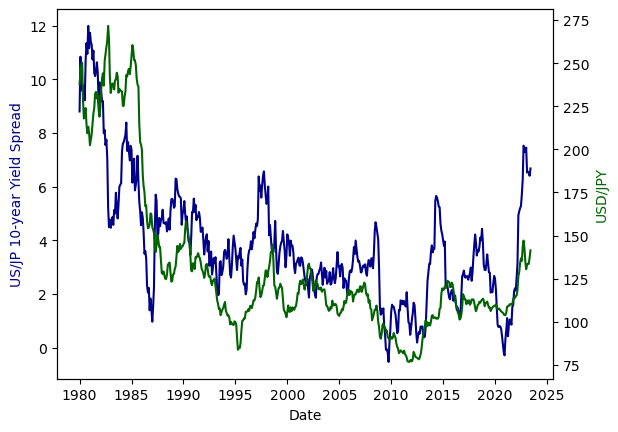

In [65]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df1.TIME_PERIOD,
        df1.usjp10s,
        color="darkblue")
# set x-axis label
ax.set_xlabel("Date", fontsize = 10)
# set y-axis label
ax.set_ylabel("US/JP 10-year Yield Spread",
              color="darkblue",
              fontsize=10)
ax2 = ax.twinx()
ax2.plot(df1.TIME_PERIOD, df1["USDJPY"],color="darkgreen")
ax2.set_ylabel("USD/JPY",color="darkgreen",fontsize=10)
plt.show()

1990 - 2000:
After the asset bubble burst in the 90s, interest rates were low, hence spreads were low. Yen thus became the main target in carry trading. 

In [78]:
df1990 = df1.loc[(df1['TIME_PERIOD'] > "1990-01-01") & (df1['TIME_PERIOD'] < "2000-01-01")]

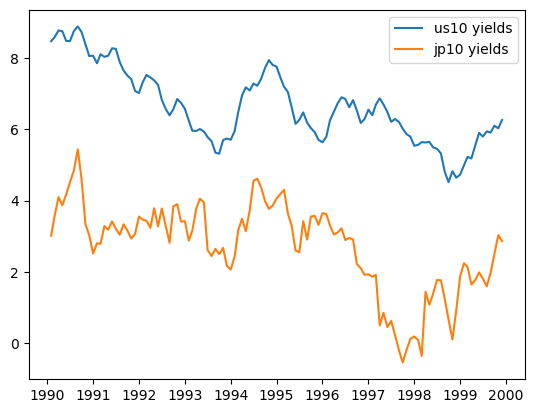

In [83]:
plt.plot(df1990.TIME_PERIOD, df1990.us10_yields, label="us10 yields")
plt.plot(df1990.TIME_PERIOD, df1990.jp10_yields,label="jp10 yields")
plt.legend()
plt.show()

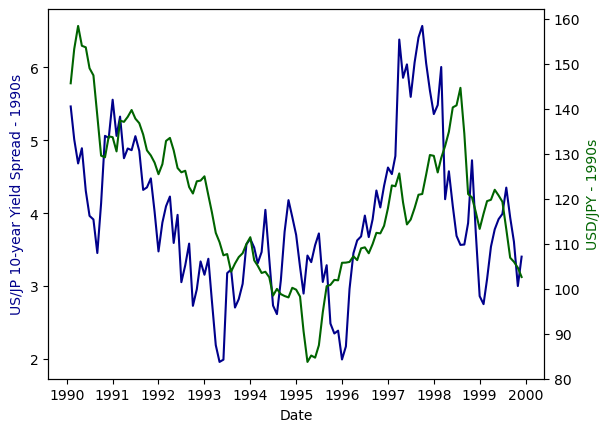

In [79]:
fig,ax1 = plt.subplots()
# make a plot
ax1.plot(df1990.TIME_PERIOD,
        df1990.usjp10s,
        color="darkblue")
# set x-axis label
ax1.set_xlabel("Date", fontsize = 10)
# set y-axis label
ax1.set_ylabel("US/JP 10-year Yield Spread - 1990s",
              color="darkblue",
              fontsize=10)
ax21 = ax1.twinx()
ax21.plot(df1990.TIME_PERIOD, df1990["USDJPY"],color="darkgreen")
ax21.set_ylabel("USD/JPY - 1990s",color="darkgreen",fontsize=10)
plt.show()

USDJPY largely follows the trend of US/JP 10s. 

When the spread increases (blue line) espeically towards 1997-1999, this fuelled carry trades where traders borrowed Yen-denominated bonds to lend USD-denominated bonds and capture rate differentials. This meant that they short JPY/long USD, hence selling of JPY caused JPY to depreciate.

2000 - 2007:
Impact of internet bubble, before Global Financial Crisis. While Japanese yields remained low, US yields fell significantly, narrowing the spread. Carry trades started to unwind.

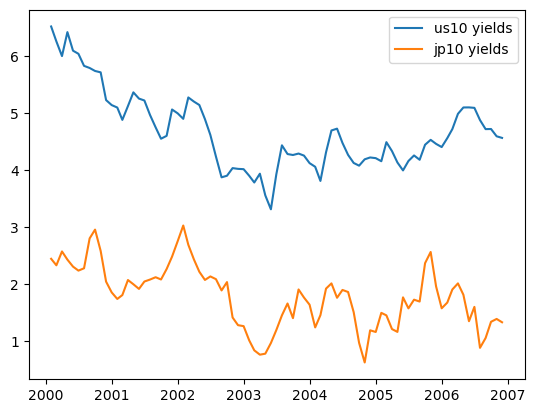

In [85]:
df2000 = df1.loc[(df1['TIME_PERIOD'] > "2000-01-01") & (df1['TIME_PERIOD'] < "2007-01-01")]
plt.plot(df2000.TIME_PERIOD, df2000.us10_yields, label="us10 yields")
plt.plot(df2000.TIME_PERIOD, df2000.jp10_yields,label="jp10 yields")
plt.legend()
plt.show()

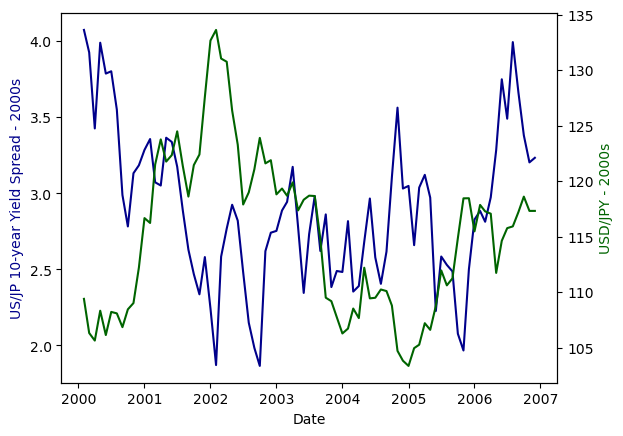

In [87]:
fig,ax2 = plt.subplots()
# make a plot
ax2.plot(df2000.TIME_PERIOD,
        df2000.usjp10s,
        color="darkblue")
# set x-axis label
ax2.set_xlabel("Date", fontsize = 10)
# set y-axis label
ax2.set_ylabel("US/JP 10-year Yield Spread - 2000s",
              color="darkblue",
              fontsize=10)
ax22 = ax2.twinx()
ax22.plot(df2000.TIME_PERIOD, df2000["USDJPY"],color="darkgreen")
ax22.set_ylabel("USD/JPY - 2000s",color="darkgreen",fontsize=10)
plt.show()

As spreads narrowed from 2000 to 2005, Yen generally appreciated as investors bought back Yen upon unwinding of carry trades.

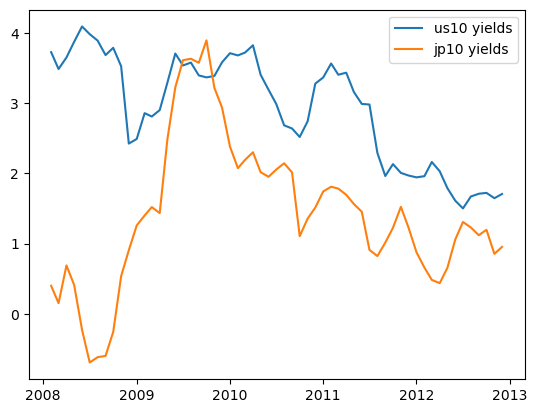

In [89]:
df2008 = df1.loc[(df1['TIME_PERIOD'] > "2008-01-01") & (df1['TIME_PERIOD'] < "2013-01-01")]
plt.plot(df2008.TIME_PERIOD, df2008.us10_yields, label="us10 yields")
plt.plot(df2008.TIME_PERIOD, df2008.jp10_yields,label="jp10 yields")
plt.legend()
plt.show()

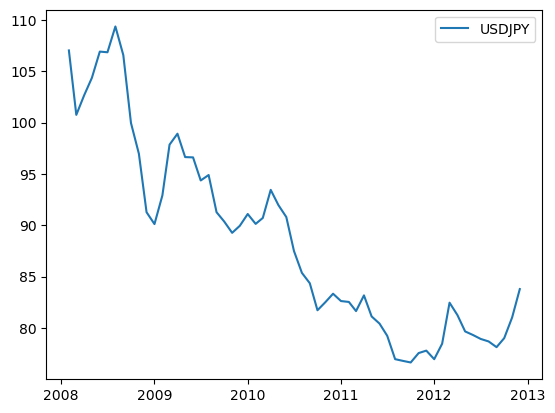

In [91]:
plt.plot(df2008.TIME_PERIOD,df2008.USDJPY,label="USDJPY")
plt.legend()
plt.show()

After the GFC, spreads closed as demand for hedging was high, hence Yen was on a 6 year streak of appreciation as investors flocked to a safe haven currency.

2013-onwards
Abe takes office and his 3 arrows lead to large differentials in US and Japan monetary policies. Rate differentials surged, and Yen depreciated to drive Japan to an export-oriented economy.

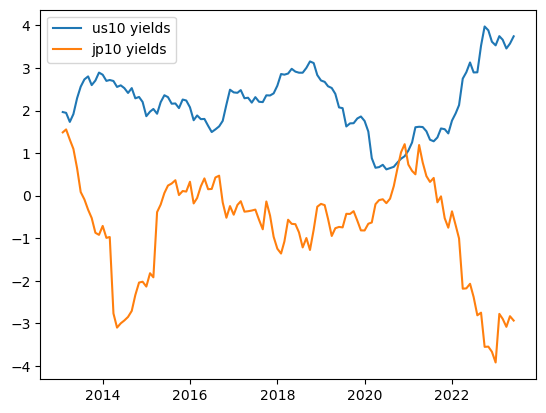

In [92]:
df2013 = df1.loc[(df1['TIME_PERIOD'] > "2013-01-01") ]
plt.plot(df2013.TIME_PERIOD, df2013.us10_yields, label="us10 yields")
plt.plot(df2013.TIME_PERIOD, df2013.jp10_yields,label="jp10 yields")
plt.legend()
plt.show()

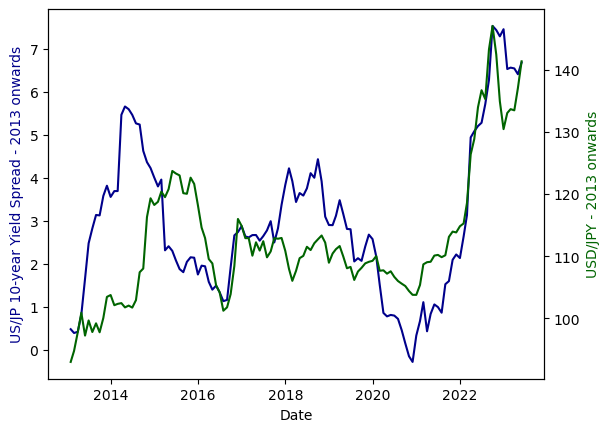

In [93]:
fig,ax3 = plt.subplots()
# make a plot
ax3.plot(df2013.TIME_PERIOD,
        df2013.usjp10s,
        color="darkblue")
# set x-axis label
ax3.set_xlabel("Date", fontsize = 10)
# set y-axis label
ax3.set_ylabel("US/JP 10-year Yield Spread - 2013 onwards",
              color="darkblue",
              fontsize=10)
ax23 = ax3.twinx()
ax23.plot(df2013.TIME_PERIOD, df2013["USDJPY"],color="darkgreen")
ax23.set_ylabel("USD/JPY - 2013 onwards",color="darkgreen",fontsize=10)
plt.show()

Between 2013 - 2014, after Abenomics came into play, and BoJ yields remained ultralow and falling steeply in 2014, it can be seen that whenever spreads increased (blue line - a marker of diverging US/JP monetary policies), carry trades surge to profit off rate differentials, short JPY/long USD, causing a depreciation of the Yen (green line).

In 2015, Fed raised interest rates as the economy gradually recovered after GFC in 2008, towards normalcy. (2%)  “The Committee judges that there has been considerable improvement in labor market conditions this year, and it is reasonably confident that inflation will rise, over the medium term, to its 2% objective,” the Fed wrote in a statement that accompanied the initial 2015 rate hike. Chinese economic growth slowed down in 2016 which fuelled market concern. This caused tensions to build up and Yen became the top choice for hedging, hence appreciating in 2015 - 2016. 

When Donald Trump got elected in 2017, 10 year yields rose slightly to account for longer duration risk given uncertainty over his term. This fuelled carry trades and caused the Yen to depreciate slightly.

 2022 marked the start of the Fed's rate hiking cycle, which has driven spreads to its highest levels, fuelling carry trades that drive significant Yen depreciation.

Focus on 2020 - 2023

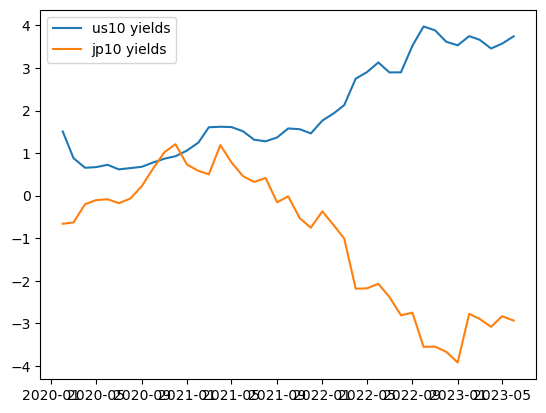

In [97]:
df2020 = df1.loc[(df1['TIME_PERIOD'] > "2020-01-01") ]
plt.plot(df2020.TIME_PERIOD, df2020.us10_yields, label="us10 yields")
plt.plot(df2020.TIME_PERIOD, df2020.jp10_yields,label="jp10 yields")
plt.legend()
plt.show()

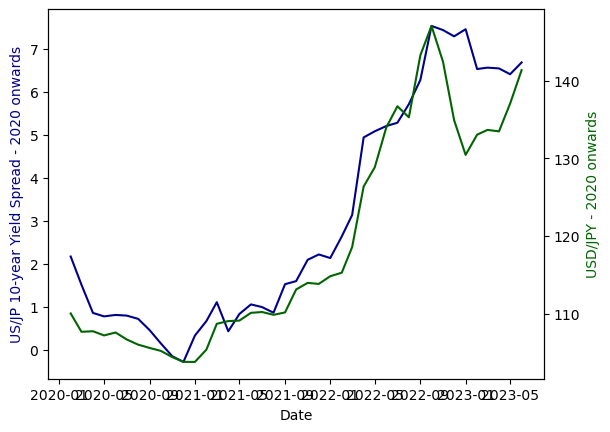

In [98]:
fig,ax4 = plt.subplots()
# make a plot
ax4.plot(df2020.TIME_PERIOD,
        df2020.usjp10s,
        color="darkblue")
# set x-axis label
ax4.set_xlabel("Date", fontsize = 10)
# set y-axis label
ax4.set_ylabel("US/JP 10-year Yield Spread - 2020 onwards",
              color="darkblue",
              fontsize=10)
ax24 = ax4.twinx()
ax24.plot(df2020.TIME_PERIOD, df2020["USDJPY"],color="darkgreen")
ax24.set_ylabel("USD/JPY - 2020 onwards",color="darkgreen",fontsize=10)
plt.show()

USDJPY and US/JP 10s recently diverged despite being highly in sync over the past few years.
US/JP 10s is an indicator of the differences between monetary policy - at this stage it is still very different.
When spread is large, JPY should depreciate due to carry trades.

An appreciating Yen is an indicator of the market expecting BoJ to fade out YCC - this was short lived.